# MNIST
* 2개의 히든 레이어를 도입한다.
* input layer는 28*28개의 노드
* hidden layer의 노드의 수는 자유롭게 설정해도 좋다.
* output은 10개(0~9)로 설정한다.

test data를 예측하여 정확도를 최대가 되도록 학습하여라.
* 제출 시 test data의 정확도를 출력하여 제출하세요.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torch.utils.data import Dataset, DataLoader
import math

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets
import torchvision.transforms as transforms

torch.set_printoptions(linewidth=120)
import time

In [2]:
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

train_data

test_data # 제출시 이 test 데이터에 대한 정확도를 출력하세요.

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [3]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 1000

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=batch_size, 
                                          num_workers=num_workers)

<ipython-input-4-731dd270b2c2>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])


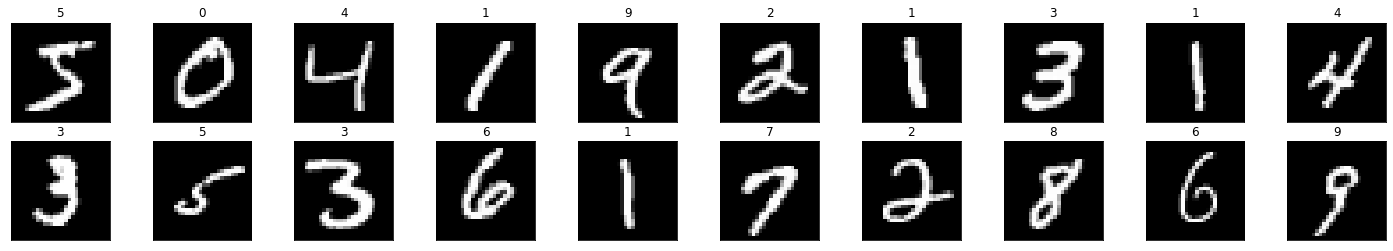

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

In [5]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        
        self.fc = nn.Sequential(
            nn.Linear(28*28, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 300),
            nn.ReLU(inplace=True),
            nn.Linear(300, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [6]:
device = torch.device("cpu")

model = Network().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=3e-3)

In [7]:
def train(model, epoch, train_loader, device, optimizer):
    model.train()
    for batch_i, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        
        output = model(data)
        loss = F.cross_entropy(output, target)
        
        loss.backward()
        optimizer.step()
        
#         if batch % 100 == 0:
#             print(f"Train Epoch: {epoch} [{batch * len(data)}/{len(train_loader.dataset)}({(100. * batch / len(train_loader)):.0f}%)] \tLoss: {loss.item():.6f}")
            
    print(f"\n Train Epoch: {epoch} \tLoss: {loss.item():.6f}")
    return loss

In [8]:
def test(model, test_loader, device):
    model.eval()
    loss = 0
    correct = 0
    with torch.no_grad():
        for batch_i, (data, target) in enumerate(test_loader):
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = F.cross_entropy(output, target)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            Accuracy = 100. * correct / len(test_loader.dataset)

    print(f"\nTest set: loss: {loss.item():.6f}, Accuracy: {correct}/{len(test_loader.dataset)}({(100. * correct / len(test_loader.dataset)):.2f}%)\n")
    print('----------------------------------------------------')
    return loss, Accuracy

In [9]:
train_loss=[]
test_loss=[]
test_Accuracy = []
def main():
    best_Accuracy = 0
    Accuracy = 0
    i = 0
    for epoch in range(1, epochs+1):
        best_Accuracy = max(best_Accuracy,Accuracy)  
        loss=train(model, epoch, train_loader, device, optimizer)
        train_loss.append(loss)
        loss,Accuracy=test(model, test_loader, device)
        test_loss.append(loss)
        test_Accuracy.append(Accuracy)
        if best_Accuracy >= Accuracy:
            i = i+1
        elif best_Accuracy < Accuracy:
            i = 0  
        if i == 30:
            break

In [10]:
epochs=1000
main()


 Train Epoch: 1 	Loss: 2.269056

Test set: loss: 2.268862, Accuracy: 4791/10000(47.91%)

----------------------------------------------------

 Train Epoch: 2 	Loss: 1.988830

Test set: loss: 2.002559, Accuracy: 5843/10000(58.43%)

----------------------------------------------------

 Train Epoch: 3 	Loss: 1.780480

Test set: loss: 1.799371, Accuracy: 7195/10000(71.95%)

----------------------------------------------------

 Train Epoch: 4 	Loss: 1.687011

Test set: loss: 1.715347, Accuracy: 8104/10000(81.04%)

----------------------------------------------------

 Train Epoch: 5 	Loss: 1.646698

Test set: loss: 1.674647, Accuracy: 8267/10000(82.67%)

----------------------------------------------------

 Train Epoch: 6 	Loss: 1.630770

Test set: loss: 1.657780, Accuracy: 8350/10000(83.50%)

----------------------------------------------------

 Train Epoch: 7 	Loss: 1.623036

Test set: loss: 1.649347, Accuracy: 8387/10000(83.87%)

----------------------------------------------------


 Train Epoch: 58 	Loss: 1.518167

Test set: loss: 1.547300, Accuracy: 9397/10000(93.97%)

----------------------------------------------------

 Train Epoch: 59 	Loss: 1.517929

Test set: loss: 1.546971, Accuracy: 9401/10000(94.01%)

----------------------------------------------------

 Train Epoch: 60 	Loss: 1.517712

Test set: loss: 1.546658, Accuracy: 9406/10000(94.06%)

----------------------------------------------------

 Train Epoch: 61 	Loss: 1.517478

Test set: loss: 1.546352, Accuracy: 9408/10000(94.08%)

----------------------------------------------------

 Train Epoch: 62 	Loss: 1.517251

Test set: loss: 1.546050, Accuracy: 9415/10000(94.15%)

----------------------------------------------------

 Train Epoch: 63 	Loss: 1.517038

Test set: loss: 1.545762, Accuracy: 9415/10000(94.15%)

----------------------------------------------------

 Train Epoch: 64 	Loss: 1.516822

Test set: loss: 1.545471, Accuracy: 9417/10000(94.17%)

---------------------------------------------


 Train Epoch: 115 	Loss: 1.510530

Test set: loss: 1.536941, Accuracy: 9484/10000(94.84%)

----------------------------------------------------

 Train Epoch: 116 	Loss: 1.510470

Test set: loss: 1.536855, Accuracy: 9484/10000(94.84%)

----------------------------------------------------

 Train Epoch: 117 	Loss: 1.510407

Test set: loss: 1.536756, Accuracy: 9485/10000(94.85%)

----------------------------------------------------

 Train Epoch: 118 	Loss: 1.510350

Test set: loss: 1.536665, Accuracy: 9487/10000(94.87%)

----------------------------------------------------

 Train Epoch: 119 	Loss: 1.510288

Test set: loss: 1.536575, Accuracy: 9487/10000(94.87%)

----------------------------------------------------

 Train Epoch: 120 	Loss: 1.510231

Test set: loss: 1.536490, Accuracy: 9487/10000(94.87%)

----------------------------------------------------

 Train Epoch: 121 	Loss: 1.510184

Test set: loss: 1.536396, Accuracy: 9489/10000(94.89%)

--------------------------------------


 Train Epoch: 172 	Loss: 1.508435

Test set: loss: 1.533365, Accuracy: 9517/10000(95.17%)

----------------------------------------------------

 Train Epoch: 173 	Loss: 1.508410

Test set: loss: 1.533321, Accuracy: 9517/10000(95.17%)

----------------------------------------------------

 Train Epoch: 174 	Loss: 1.508387

Test set: loss: 1.533275, Accuracy: 9518/10000(95.18%)

----------------------------------------------------

 Train Epoch: 175 	Loss: 1.508363

Test set: loss: 1.533235, Accuracy: 9520/10000(95.20%)

----------------------------------------------------

 Train Epoch: 176 	Loss: 1.508337

Test set: loss: 1.533198, Accuracy: 9521/10000(95.21%)

----------------------------------------------------

 Train Epoch: 177 	Loss: 1.508314

Test set: loss: 1.533165, Accuracy: 9521/10000(95.21%)

----------------------------------------------------

 Train Epoch: 178 	Loss: 1.508288

Test set: loss: 1.533116, Accuracy: 9522/10000(95.22%)

--------------------------------------


 Train Epoch: 229 	Loss: 1.507416

Test set: loss: 1.531617, Accuracy: 9532/10000(95.32%)

----------------------------------------------------

 Train Epoch: 230 	Loss: 1.507395

Test set: loss: 1.531590, Accuracy: 9533/10000(95.33%)

----------------------------------------------------

 Train Epoch: 231 	Loss: 1.507388

Test set: loss: 1.531563, Accuracy: 9533/10000(95.33%)

----------------------------------------------------

 Train Epoch: 232 	Loss: 1.507379

Test set: loss: 1.531544, Accuracy: 9533/10000(95.33%)

----------------------------------------------------

 Train Epoch: 233 	Loss: 1.507368

Test set: loss: 1.531528, Accuracy: 9533/10000(95.33%)

----------------------------------------------------

 Train Epoch: 234 	Loss: 1.507356

Test set: loss: 1.531501, Accuracy: 9533/10000(95.33%)

----------------------------------------------------

 Train Epoch: 235 	Loss: 1.507347

Test set: loss: 1.531475, Accuracy: 9534/10000(95.34%)

--------------------------------------

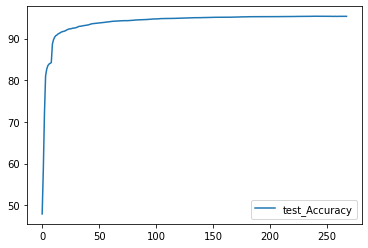

In [11]:
plt.plot(test_Accuracy,label='test_Accuracy')
plt.legend()

Epoch 30번 동안 best_Accuracy가 갱신되지 않는다면 더 이상의 Tranining은 의미가 없다고 판단했다.

best_Accuracy 는 95.34% 이다.

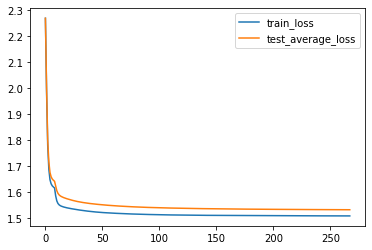

In [12]:
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_average_loss')
plt.legend()

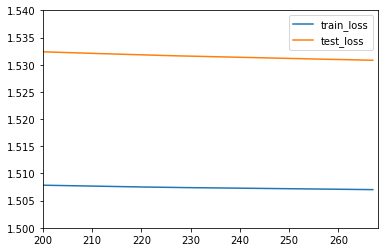

In [14]:
plt.plot(train_loss,label='train_loss')
plt.plot(test_loss,label='test_loss')
plt.xlim([200,268])
plt.ylim([1.5,1.54])
plt.legend()

네트워크가 중지되는 epoch=268 까지 train_loss와  test_loss가 함께 감소하고 있기 때문에 overfitting은 일어나지 않았다.